In [9]:
from torchvision import transforms as tfs
import PIL.ImageOps
import numpy as np
from utils import Generator as netG
import torch.nn as nn
import torch
import PIL.Image as Image
import matplotlib.pyplot as plt

available_device = 'cuda'

transformations = [
                   tfs.Grayscale(),
                   tfs.Resize((128, 128)),
                   tfs.Lambda(lambda x: PIL.ImageOps.invert(x)),
                   tfs.ToTensor()
]

trans = tfs.Compose(transformations)

image = trans(Image.open('/var/www/uploaded_file.jpg')).reshape(-1, 1, 128, 128)

# Model Initiaimgsation
model_G = netG.Generator(nc_input=2, nc_output=1).to(available_device)
checkpoint = torch.load("models/generador_v9_current_5000.pkl")
model_G.load_state_dict(checkpoint)
model_G = model_G.eval()

image = image.to(available_device)
blacks = torch.zeros_like(image).to(available_device)
origin_A = torch.cat((image, blacks), 1)
predicted_A = model_G(origin_A)
predicted_A = predicted_A + image
predicted_A[predicted_A>1] = 1 

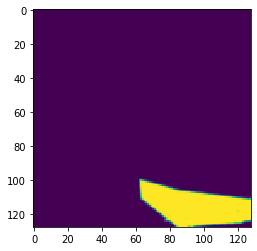

In [14]:
plt.imshow(image.detach().cpu().numpy().reshape(128, 128))

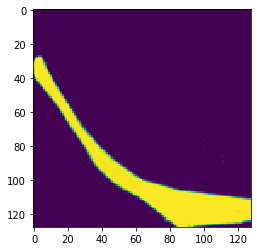

In [8]:
plt.imshow(predicted_A.detach().cpu().numpy().reshape(128, 128))